In [28]:
import os
import numpy as np
from scipy.io.wavfile import read as waveread
import pysptk
from functools import cached_property
import librosa

import matplotlib.pyplot as plt


FRAME_LENGTH = 1024
HOP = 80
FR = 16000
ORDER = 25
ALPHA = 0.41

class SynthesizedVowel:
    def __init__(self, filepath):
        s = os.path.basename(filepath).split('.')[0].split('_')

        self.filepath = filepath
        self.vowel = s[0]
        self.bloc = s[1]
        self.repetition = s[3]
        assist_string = s[5]
        self.assist = 1 if '1' else float(assist_string)/10.0

        self.wav = waveread(filepath)
        self.data = np.array(self.wav[1], dtype=np.float64)

    @cached_property
    def mcep(self):
        # Note that almost all of pysptk functions assume input array is C-contiguous and np.float64 element type
        frames = librosa.util.frame(self.mid, frame_length=FRAME_LENGTH, hop_length=80).astype(np.float64).T
        
        # Windowing
        frames *= pysptk.blackman(FRAME_LENGTH)
        
        return pysptk.sptk.mcep(frames, order=ORDER, alpha=ALPHA)

    @cached_property
    def left(self):
        return np.array([d[0] for d in self.data], dtype=np.float64)

    @cached_property
    def right(self):
        return np.array([d[1] for d in self.data], dtype=np.float64)
   
    @cached_property
    def mid(self):
        return (self.left + self.right) / 2.0 

    @cached_property
    def side(self):
        return (self.left - self.right) / 2.0


class TruthVowel:
    def __init__(self, filepath):
        filename_without_ext = os.path.basename(filepath).split('.')[0]

        self.filepath = filepath
        self.vowel = filename_without_ext

        self.wav = waveread(filepath)
        self.data = np.array(self.wav[1], dtype=np.float64)
        
    @cached_property
    def mcep(self):
        return mcep(self.data)

    @cached_property
    def mcep(self):
        # Note that almost all of pysptk functions assume input array is C-contiguous and np.float64 element type
        frames = librosa.util.frame(self.data, frame_length=FRAME_LENGTH, hop_length=80).astype(np.float64).T
        
        # Windowing
        frames *= pysptk.blackman(FRAME_LENGTH)
        
        return pysptk.sptk.mcep(frames, order=ORDER, alpha=ALPHA)


# get complete vowels files
complete_synthesis_path = 'static/data/P5_D4_RT_003_cam_complete_synthesis/'

waves_paths = [os.path.join(complete_synthesis_path, f) for f in os.listdir(complete_synthesis_path)]
waves_paths = [w for w in waves_paths if os.path.isfile(w)] 
synthesis = [SynthesizedVowel(path) for path in waves_paths]
        

# match them with the corresponding by vowels
by_vowels_path = 'static/data/P5_D4_RT_003_cam_complete_synthesis/truth/'

waves_paths = [os.path.join(by_vowels_path, f) for f in os.listdir(by_vowels_path)]
truth = [TruthVowel(path) for path in waves_paths]


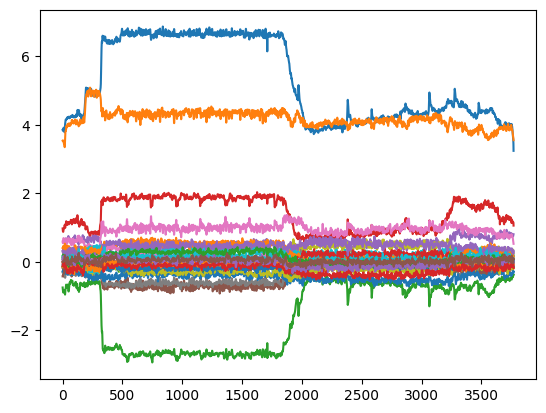

In [29]:
plt.plot(synthesis[0].mcep)

In [ ]:
# compute mels of long vowels

# compute average mel cepstrum of truth vowels
